In [1]:
from scipy.stats import friedmanchisquare, levene, wilcoxon
import pandas as pd
import re

def extract_number(text):
  match = re.search(r'tensor\((.+)\)', text)  # Use regular expression to find 'tensor(' followed by capturing group for the number
  return float(match.group(1)) if match else None  # Extract the number and convert to float, return None if not found

# Apply the function to the 'text' column and store the results in a new column


In [4]:
a = pd.read_csv('../genetic_programming/logs/lactose/6_cv_results.csv', sep=';')['val_score']
a = a.apply(extract_number)
print(a)

b = pd.read_csv('../genetic_programming/logs/lactose/7_cv_results.csv', sep=';')['val_score']
b = b.apply(extract_number)
print(b)

c = pd.read_csv('../genetic_programming/logs/lactose/8_cv_results.csv', sep=';')['val_score']
c = c.apply(extract_number)
c

0    1.0942
1    0.6234
2    0.6462
3    0.6456
4    0.6492
5    0.9475
6    1.2476
7    1.1970
8    0.4684
9    0.6604
Name: val_score, dtype: float64
0    0.4122
1    0.4144
2    0.1869
3    0.0817
4    0.1097
5    0.0642
6    0.1120
7    0.4105
8    0.0645
9    0.1443
Name: val_score, dtype: float64


0    0.3165
1    0.6234
2    2.0110
3    0.6991
4    2.2318
5    0.6260
6    0.7370
7    0.6414
8    0.6512
9    0.6604
Name: val_score, dtype: float64

In [3]:
wilcoxon(a, b, alternative='greater')

WilcoxonResult(statistic=55.0, pvalue=0.0009765625)

In [8]:
import numpy as np
import scipy.stats as stats

def wilcoxon_test_pvalues(data1, data2):
  """
  Performs Wilcoxon signed-rank test and returns the p-value.

  Args:
      data1 (list): List of data points for group 1.
      data2 (list): List of data points for group 2.

  Returns:
      float: p-value from the Wilcoxon signed-rank test.
  """
  _, p_value = stats.wilcoxon(data1, data2)
  return p_value

def create_kinf_matrix(data_list):
  """
  Creates a kinship (kinf) of p-value matrix from a list of data lists.

  Args:
      data_list (list): List of lists, where each inner list represents data points for a group.

  Returns:
      numpy.ndarray: Kinf of p-value matrix.
  """
  n = len(data_list)
  p_value_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i, n):  # Fill upper triangular matrix only (excluding diagonal)
      p_value_matrix[i, j] = wilcoxon_test_pvalues(a, b)
  # Fill lower triangular matrix by mirroring upper triangular values
  p_value_matrix += p_value_matrix.T - np.diag(p_value_matrix.diagonal())
  return p_value_matrix


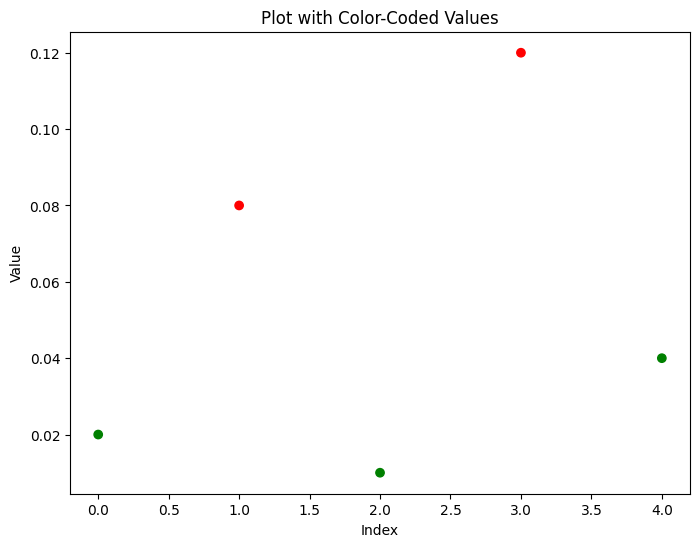

In [10]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
values = [0.02, 0.08, 0.01, 0.12, 0.04]

# Color list based on values (green for below 0.05, red for above)
colors = ['green' if val < 0.05 else 'red' for val in values]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(values)), values, c=colors)  # Use 'c' for color

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot with Color-Coded Values')

# Show the plot
plt.show()

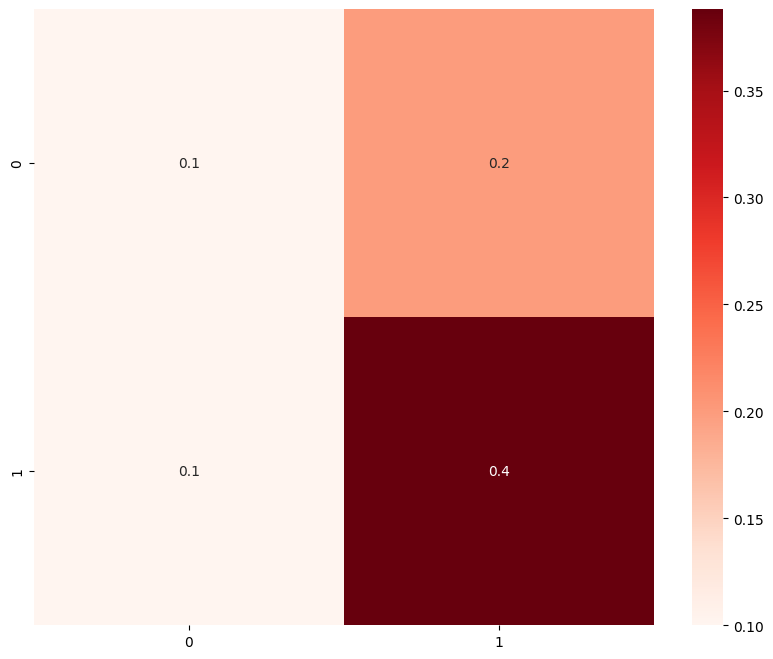

In [14]:
import seaborn as sns
def cor_heatmap(cor):
    plt.figure(figsize=(10,8))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1f', robust=True)
    plt.show()
cor_heatmap(
    [[0.1,0.2],
    [0.1,0.4]]
)

In [9]:
# Sample data (fix the last element)
data_list = [
    [5.6, 7.5, 4.3],
    [8.4, 10.2, 6.7],
    [1.2, 3.4, 2.1],  # Add the missing data for the last group (replace with actual data)
]

kinf_matrix = create_kinf_matrix(data_list)
print(kinf_matrix)


[[0.00195312 0.00195312 0.00195312]
 [0.00195312 0.00195312 0.00195312]
 [0.00195312 0.00195312 0.00195312]]
